In [1243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy.stats import linregress

In [1244]:
df = pd.read_csv('data.csv', index_col='Pull Request')

In [1245]:
df.head()

,Name,Message,Created at,Updated at,Additions,Commits,Status,File changed
Pull Request,,,,,,,,
85,"NamedUser(login=""khaidv123"")",Add files via upload,15/05/2023 16:40,15/05/2023 16:40,281739,10,failure,"['week_ (1)/Exercises.ipynb', 'week_ (1)/Exerc..."
85,"NamedUser(login=""khaidv123"")",commit,15/05/2023 16:40,15/05/2023 16:44,281739,10,success,"['week_ (2)/README.MD', 'week_ (2)/__pycache__..."
85,"NamedUser(login=""khaidv123"")",Merge branch 'gungui98:master' into master,15/05/2023 16:40,19/05/2023 9:55,281739,10,failure,"['.github/workflows/test.yml', 'week_ (8)/boil..."
85,"NamedUser(login=""khaidv123"")",commit week8,15/05/2023 16:40,19/05/2023 14:11,281739,10,failure,['week_ (8)/boilerplate-sea-level-predictor-ma...
85,"NamedUser(login=""khaidv123"")",Add files via upload,15/05/2023 16:40,19/05/2023 14:19,281739,10,failure,['week_ (8)/boilerplate-sea-level-predictor-ma...


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
## Data Cleaning
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [1246]:
pd.isna(df).any()

Name             True
Message         False
Created at      False
Updated at      False
Additions       False
Commits         False
Status          False
File changed     True
dtype: bool

In [1247]:
df[df['Name'].isna()]

,Name,Message,Created at,Updated at,Additions,Commits,Status,File changed
Pull Request,,,,,,,,
84,NaN,'ex_today',15/05/2023 9:29,08/05/2023 9:52,3104,11,unknown,"['week_ (1)/Exercises.ipynb', 'week_ (1)/Exerc..."
84,NaN,'readme',15/05/2023 9:29,08/05/2023 9:55,3104,11,failure,['README.md']
84,NaN,'ex8/5/23',15/05/2023 9:29,08/05/2023 10:57,3104,11,success,['week_ (5)/boilerplate-demographic-data-analy...
84,NaN,'ex12/5',15/05/2023 9:29,12/05/2023 16:00,3104,11,failure,"['.github/workflows/test.yml', 'week_ (6)/boil..."
84,NaN,'ex15/5',15/05/2023 9:29,15/05/2023 10:33,3104,11,failure,['week_ (7)/boilerplate-page-view-time-series-...
...,...,...,...,...,...,...,...,...
63,NaN,abc,07/05/2023 14:48,07/05/2023 14:47,3080,18,unknown,"['.github/workflows/test.yml', 'week_ (4)/1 - ..."
52,NaN,Exercise,29/04/2023 5:08,29/04/2023 5:07,284,4,failure,"['.DS_Store', 'week_ (1)/Exercises.ipynb', 'we..."
51,NaN,Exercise,29/04/2023 1:36,28/04/2023 10:21,2597,4,failure,"['week_ (1)/Exercises.ipynb', 'week_ (1)/Exerc..."


In [1248]:
df.loc[84]

,Name,Message,Created at,Updated at,Additions,Commits,Status,File changed
Pull Request,,,,,,,,
84,NaN,'ex_today',15/05/2023 9:29,08/05/2023 9:52,3104,11,unknown,"['week_ (1)/Exercises.ipynb', 'week_ (1)/Exerc..."
84,NaN,'readme',15/05/2023 9:29,08/05/2023 9:55,3104,11,failure,['README.md']
84,NaN,'ex8/5/23',15/05/2023 9:29,08/05/2023 10:57,3104,11,success,['week_ (5)/boilerplate-demographic-data-analy...
84,"NamedUser(login=""NguyenManhAI"")",Merge branch 'gungui98:master' into master,15/05/2023 9:29,12/05/2023 6:23,3104,11,failure,"['.github/workflows/test.yml', 'week_ (5)/boil..."
84,NaN,'ex12/5',15/05/2023 9:29,12/05/2023 16:00,3104,11,failure,"['.github/workflows/test.yml', 'week_ (6)/boil..."
84,"NamedUser(login=""NguyenManhAI"")",Merge branch 'gungui98:master' into master,15/05/2023 9:29,15/05/2023 9:14,3104,11,failure,"['.github/workflows/test.yml', 'week_ (6)/READ..."
84,NaN,'ex15/5',15/05/2023 9:29,15/05/2023 10:33,3104,11,failure,['week_ (7)/boilerplate-page-view-time-series-...
84,NaN,'ex15/5/23',15/05/2023 9:29,15/05/2023 14:50,3104,11,success,['.github/workflows/test.yml']
84,"NamedUser(login=""NguyenManhAI"")",Merge branch 'gungui98:master' into master,15/05/2023 9:29,19/05/2023 6:04,3104,11,failure,"['.github/workflows/test.yml', 'week_ (8)/boil..."


In [1249]:
df.loc[26]

,Name,Message,Created at,Updated at,Additions,Commits,Status,File changed
Pull Request,,,,,,,,
26,"NamedUser(login=""invalid-email-address"")",add README,21/04/2023 8:51,21/04/2023 8:45,3463,96,unknown,['README.md']
26,"NamedUser(login=""truongchd"")",Create README.md,21/04/2023 8:51,21/04/2023 8:47,3463,96,unknown,['README.md']
26,"NamedUser(login=""invalid-email-address"")",Merge branch 'master' of https://github.com/tr...,21/04/2023 8:51,21/04/2023 8:49,3463,96,unknown,['README.md']
26,"NamedUser(login=""invalid-email-address"")",Change README.md,21/04/2023 8:51,21/04/2023 8:50,3463,96,unknown,['README.md']
26,"NamedUser(login=""invalid-email-address"")",finish all week 1 + week 2,21/04/2023 8:51,24/04/2023 10:48,3463,96,unknown,"['week_ (1)/Exercises.ipynb', 'week_ (1)/Exerc..."
...,...,...,...,...,...,...,...,...
26,"NamedUser(login=""invalid-email-address"")",week 8 part 1,21/04/2023 8:51,19/05/2023 7:16,3463,96,failure,['week_ (8)/boilerplate-sea-level-predictor-ma...
26,"NamedUser(login=""invalid-email-address"")",week 8,21/04/2023 8:51,19/05/2023 7:20,3463,96,failure,['week_ (8)/boilerplate-sea-level-predictor-ma...
26,"NamedUser(login=""invalid-email-address"")",week 8 part 1,21/04/2023 8:51,19/05/2023 7:22,3463,96,failure,['week_ (8)/boilerplate-sea-level-predictor-ma...


In [1250]:
#Tách tên ra khỏi chuỗi NamedUser(login="    ")
df['Name'] = pd.DataFrame(df['Name'])['Name'].str.split("=").str[1].str[1:-2]

In [1251]:
df[df['Name'].isna()]

,Name,Message,Created at,Updated at,Additions,Commits,Status,File changed
Pull Request,,,,,,,,
84,NaN,'ex_today',15/05/2023 9:29,08/05/2023 9:52,3104,11,unknown,"['week_ (1)/Exercises.ipynb', 'week_ (1)/Exerc..."
84,NaN,'readme',15/05/2023 9:29,08/05/2023 9:55,3104,11,failure,['README.md']
84,NaN,'ex8/5/23',15/05/2023 9:29,08/05/2023 10:57,3104,11,success,['week_ (5)/boilerplate-demographic-data-analy...
84,NaN,'ex12/5',15/05/2023 9:29,12/05/2023 16:00,3104,11,failure,"['.github/workflows/test.yml', 'week_ (6)/boil..."
84,NaN,'ex15/5',15/05/2023 9:29,15/05/2023 10:33,3104,11,failure,['week_ (7)/boilerplate-page-view-time-series-...
...,...,...,...,...,...,...,...,...
8,NaN,Add files via upload,21/04/2023 8:42,08/05/2023 9:28,0,0,unknown,NaN
7,NaN,Add files via upload,21/04/2023 8:42,28/04/2023 6:16,0,0,unknown,NaN
6,NaN,Add files via upload,21/04/2023 8:41,24/04/2023 10:51,0,0,unknown,NaN


In [1252]:
#Xoá những commit của gv
df = df.loc[df['Name'] != 'gungui98']
df = df.loc[df['Name'] != 'lqanh11']
df = df.loc[df['Name'] != 'quocanhuet']

In [1253]:
df.loc[84]

,Name,Message,Created at,Updated at,Additions,Commits,Status,File changed
Pull Request,,,,,,,,
84,NaN,'ex_today',15/05/2023 9:29,08/05/2023 9:52,3104,11,unknown,"['week_ (1)/Exercises.ipynb', 'week_ (1)/Exerc..."
84,NaN,'readme',15/05/2023 9:29,08/05/2023 9:55,3104,11,failure,['README.md']
84,NaN,'ex8/5/23',15/05/2023 9:29,08/05/2023 10:57,3104,11,success,['week_ (5)/boilerplate-demographic-data-analy...
84,NguyenManhAI,Merge branch 'gungui98:master' into master,15/05/2023 9:29,12/05/2023 6:23,3104,11,failure,"['.github/workflows/test.yml', 'week_ (5)/boil..."
84,NaN,'ex12/5',15/05/2023 9:29,12/05/2023 16:00,3104,11,failure,"['.github/workflows/test.yml', 'week_ (6)/boil..."
84,NguyenManhAI,Merge branch 'gungui98:master' into master,15/05/2023 9:29,15/05/2023 9:14,3104,11,failure,"['.github/workflows/test.yml', 'week_ (6)/READ..."
84,NaN,'ex15/5',15/05/2023 9:29,15/05/2023 10:33,3104,11,failure,['week_ (7)/boilerplate-page-view-time-series-...
84,NaN,'ex15/5/23',15/05/2023 9:29,15/05/2023 14:50,3104,11,success,['.github/workflows/test.yml']
84,NguyenManhAI,Merge branch 'gungui98:master' into master,15/05/2023 9:29,19/05/2023 6:04,3104,11,failure,"['.github/workflows/test.yml', 'week_ (8)/boil..."


In [1254]:
#Điền vào những phần tên còn thiếu(chỉ điền trong phạm vi pr)
pull_rqs = df.index.unique()
for pull_rp in pull_rqs:
    df.loc[df.index == pull_rp, 'Name'] = df.loc[df.index == pull_rp, 'Name'].fillna(method='bfill')
    df.loc[df.index == pull_rp, 'Name'] = df.loc[df.index == pull_rp, 'Name'].fillna(method='ffill')

In [1255]:
#Xoá những dòng không có tên
df.dropna(subset='Name', inplace=True)

In [1256]:
df.head()

,Name,Message,Created at,Updated at,Additions,Commits,Status,File changed
Pull Request,,,,,,,,
85,khaidv123,Add files via upload,15/05/2023 16:40,15/05/2023 16:40,281739,10,failure,"['week_ (1)/Exercises.ipynb', 'week_ (1)/Exerc..."
85,khaidv123,commit,15/05/2023 16:40,15/05/2023 16:44,281739,10,success,"['week_ (2)/README.MD', 'week_ (2)/__pycache__..."
85,khaidv123,Merge branch 'gungui98:master' into master,15/05/2023 16:40,19/05/2023 9:55,281739,10,failure,"['.github/workflows/test.yml', 'week_ (8)/boil..."
85,khaidv123,commit week8,15/05/2023 16:40,19/05/2023 14:11,281739,10,failure,['week_ (8)/boilerplate-sea-level-predictor-ma...
85,khaidv123,Add files via upload,15/05/2023 16:40,19/05/2023 14:19,281739,10,failure,['week_ (8)/boilerplate-sea-level-predictor-ma...


In [1257]:
df['Name'].unique()

array(['khaidv123', 'NguyenManhAI', 'trnamanh12', 'cpython219',
       'dangnq2501', 'thaisonatk', 'khoavpt', 'bacngv',
       'nguyenmanhcuong29092004', 'Binhdn04', 'TienVM2004', 'DucDM2202',
       'anhnd1', 'VinhPhamAI', 'NguyenNamDuong-22022512', 'hueptk0711',
       'anhnvVNU', 'minhnn1', 'tannn0', 'sambt22022517', 'NinhDT22022522',
       'VinhBQ21-7', 'hieuhn09', 'nhuyha', 'HungLV2512', 'Hung2512',
       'invalid-email-address', 'truongchd', 'NguyenDung0210', 'PhuTD1',
       'nhatdm22022537', 'manhbd-22022602', 'Hanhdz123'], dtype=object)

In [1258]:
df.loc[df['Name'] == 'invalid-email-address']

,Name,Message,Created at,Updated at,Additions,Commits,Status,File changed
Pull Request,,,,,,,,
26,invalid-email-address,add README,21/04/2023 8:51,21/04/2023 8:45,3463,96,unknown,['README.md']
26,invalid-email-address,Merge branch 'master' of https://github.com/tr...,21/04/2023 8:51,21/04/2023 8:49,3463,96,unknown,['README.md']
26,invalid-email-address,Change README.md,21/04/2023 8:51,21/04/2023 8:50,3463,96,unknown,['README.md']
26,invalid-email-address,finish all week 1 + week 2,21/04/2023 8:51,24/04/2023 10:48,3463,96,unknown,"['week_ (1)/Exercises.ipynb', 'week_ (1)/Exerc..."
26,invalid-email-address,change week 2 exercise 1 a bit,21/04/2023 8:51,24/04/2023 11:03,3463,96,unknown,['week_ (2)/.ipynb_checkpoints/exercise_1-chec...
...,...,...,...,...,...,...,...,...
26,invalid-email-address,week 8 part 1,21/04/2023 8:51,19/05/2023 7:35,3463,96,failure,['week_ (8)/boilerplate-sea-level-predictor-ma...
26,invalid-email-address,week 8,21/04/2023 8:51,19/05/2023 7:39,3463,96,success,['week_ (8)/boilerplate-sea-level-predictor-ma...
20,invalid-email-address,add README,21/04/2023 8:48,21/04/2023 8:45,2,4,unknown,['README.md']


In [1259]:
df.loc[26]

,Name,Message,Created at,Updated at,Additions,Commits,Status,File changed
Pull Request,,,,,,,,
26,invalid-email-address,add README,21/04/2023 8:51,21/04/2023 8:45,3463,96,unknown,['README.md']
26,truongchd,Create README.md,21/04/2023 8:51,21/04/2023 8:47,3463,96,unknown,['README.md']
26,invalid-email-address,Merge branch 'master' of https://github.com/tr...,21/04/2023 8:51,21/04/2023 8:49,3463,96,unknown,['README.md']
26,invalid-email-address,Change README.md,21/04/2023 8:51,21/04/2023 8:50,3463,96,unknown,['README.md']
26,invalid-email-address,finish all week 1 + week 2,21/04/2023 8:51,24/04/2023 10:48,3463,96,unknown,"['week_ (1)/Exercises.ipynb', 'week_ (1)/Exerc..."
...,...,...,...,...,...,...,...,...
26,invalid-email-address,week 8 part 1,21/04/2023 8:51,19/05/2023 7:16,3463,96,failure,['week_ (8)/boilerplate-sea-level-predictor-ma...
26,invalid-email-address,week 8,21/04/2023 8:51,19/05/2023 7:20,3463,96,failure,['week_ (8)/boilerplate-sea-level-predictor-ma...
26,invalid-email-address,week 8 part 1,21/04/2023 8:51,19/05/2023 7:22,3463,96,failure,['week_ (8)/boilerplate-sea-level-predictor-ma...


In [1260]:
df.loc[20]

,Name,Message,Created at,Updated at,Additions,Commits,Status,File changed
Pull Request,,,,,,,,
20,invalid-email-address,add README,21/04/2023 8:48,21/04/2023 8:45,2,4,unknown,['README.md']
20,truongchd,Create README.md,21/04/2023 8:48,21/04/2023 8:47,2,4,unknown,['README.md']
20,invalid-email-address,Merge branch 'master' of https://github.com/tr...,21/04/2023 8:48,21/04/2023 8:49,2,4,unknown,['README.md']
20,invalid-email-address,Change README.md,21/04/2023 8:48,21/04/2023 8:50,2,4,unknown,['README.md']


In [1261]:
df['Name'] = df['Name'].replace('invalid-email-address', 'truongchd')

In [1262]:
df['Name'] = df['Name'].replace('Hung2512', 'HungLV2512')

In [1263]:
grouped = df.groupby('Pull Request')

# Kiểm tra số lượng tên duy nhất trong mỗi nhóm
for index, group in grouped:
    unique_names = group['Name'].nunique()
    if unique_names > 1:    
        print(f"Index: {index}, Name: {unique_names}")

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


In [1264]:
df['Status'].unique()

array(['failure', 'success', 'unknown'], dtype=object)

In [1265]:
df['Status'].replace('unknown', 'failure', inplace=True)

In [1266]:
df['Status'].unique()

array(['failure', 'success'], dtype=object)

In [1267]:
df.loc[(df['Commits'] == 0) | (df['Additions'] == 0)]

,Name,Message,Created at,Updated at,Additions,Commits,Status,File changed
Pull Request,,,,,,,,


In [1268]:
df = df.drop(df[(df['Commits'] == 0) | (df['Additions'] == 0)].index)

In [1269]:
df = df.drop('Created at', axis=1)

In [1270]:
df.loc[80]

,Name,Message,Updated at,Additions,Commits,Status,File changed
Pull Request,,,,,,,
80,cpython219,btvn,28/04/2023 8:16,5948,30,failure,"['week_ (1)/Exercises.ipynb', 'week_ (1)/Exerc..."
80,cpython219,btvn,28/04/2023 8:18,5948,30,failure,['week_ (2)/exercise_1.ipynb']
80,cpython219,Merge branch 'gungui98:master' into master,28/04/2023 8:19,5948,30,failure,"['.github/workflows/test.yml', '.github/workfl..."
80,cpython219,btvn,28/04/2023 8:30,5948,30,failure,"['week_ (2)/person/person .py', 'week_ (2)/per..."
80,cpython219,btvn,28/04/2023 8:32,5948,30,failure,['week_ (2)/exercise_2.ipynb']
80,cpython219,longden,28/04/2023 8:36,5948,30,failure,['week_ (2)/exercise_1.ipynb']
80,cpython219,Merge branch 'master' of github.com:cpython219...,28/04/2023 8:40,5948,30,failure,"['.github/workflows/test.yml', '.github/workfl..."
80,cpython219,btvn,28/04/2023 8:46,5948,30,failure,"['week_ (2)/person/person.py', 'week_ (2)/pers..."
80,cpython219,btvn,28/04/2023 9:18,5948,30,failure,"['week_ (2)/exercise_2.ipynb', 'week_ (2)/pers..."


In [1271]:
df.head()

,Name,Message,Updated at,Additions,Commits,Status,File changed
Pull Request,,,,,,,
85,khaidv123,Add files via upload,15/05/2023 16:40,281739,10,failure,"['week_ (1)/Exercises.ipynb', 'week_ (1)/Exerc..."
85,khaidv123,commit,15/05/2023 16:44,281739,10,success,"['week_ (2)/README.MD', 'week_ (2)/__pycache__..."
85,khaidv123,Merge branch 'gungui98:master' into master,19/05/2023 9:55,281739,10,failure,"['.github/workflows/test.yml', 'week_ (8)/boil..."
85,khaidv123,commit week8,19/05/2023 14:11,281739,10,failure,['week_ (8)/boilerplate-sea-level-predictor-ma...
85,khaidv123,Add files via upload,19/05/2023 14:19,281739,10,failure,['week_ (8)/boilerplate-sea-level-predictor-ma...


In [1272]:
def extract_unique_weeks(file_string):
    weeks = set()
    matches = re.findall(r'week_\s*\((\d+)\)', file_string)
    for match in matches:
        weeks.add(int(match))
    weeks = sorted(set(weeks))
    return list(weeks)

df['Week'] = df['File changed'].apply(extract_unique_weeks)

In [1273]:
df.head()

,Name,Message,Updated at,Additions,Commits,Status,File changed,Week
Pull Request,,,,,,,,
85,khaidv123,Add files via upload,15/05/2023 16:40,281739,10,failure,"['week_ (1)/Exercises.ipynb', 'week_ (1)/Exerc...",[1]
85,khaidv123,commit,15/05/2023 16:44,281739,10,success,"['week_ (2)/README.MD', 'week_ (2)/__pycache__...","[2, 3, 4, 5, 6, 7]"
85,khaidv123,Merge branch 'gungui98:master' into master,19/05/2023 9:55,281739,10,failure,"['.github/workflows/test.yml', 'week_ (8)/boil...",[8]
85,khaidv123,commit week8,19/05/2023 14:11,281739,10,failure,['week_ (8)/boilerplate-sea-level-predictor-ma...,[8]
85,khaidv123,Add files via upload,19/05/2023 14:19,281739,10,failure,['week_ (8)/boilerplate-sea-level-predictor-ma...,[8]


In [1274]:
df = df.drop('File changed', axis=1)

In [1275]:
df.head()

,Name,Message,Updated at,Additions,Commits,Status,Week
Pull Request,,,,,,,
85,khaidv123,Add files via upload,15/05/2023 16:40,281739,10,failure,[1]
85,khaidv123,commit,15/05/2023 16:44,281739,10,success,"[2, 3, 4, 5, 6, 7]"
85,khaidv123,Merge branch 'gungui98:master' into master,19/05/2023 9:55,281739,10,failure,[8]
85,khaidv123,commit week8,19/05/2023 14:11,281739,10,failure,[8]
85,khaidv123,Add files via upload,19/05/2023 14:19,281739,10,failure,[8]


In [1276]:
df['Updated at'] = pd.to_datetime(df['Updated at'], format='%d/%m/%Y %H:%M')
df['Updated at'] = df['Updated at'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [1277]:
df.loc[11]

,Name,Message,Updated at,Additions,Commits,Status,Week
Pull Request,,,,,,,
11,manhbd-22022602,README.md,2023-04-21 08:39:00,2515,39,failure,[]
11,manhbd-22022602,Update README.md,2023-04-21 08:49:00,2515,39,failure,[]
11,manhbd-22022602,Merge branch 'gungui98:master' into master,2023-04-28 06:13:00,2515,39,failure,"[1, 2, 3]"
11,manhbd-22022602,Merge branch 'gungui98:master' into master,2023-04-28 06:55:00,2515,39,failure,[2]
11,manhbd-22022602,nop bai tap,2023-04-28 07:20:00,2515,39,failure,"[1, 2, 3]"
11,manhbd-22022602,nop bai tap,2023-04-28 08:07:00,2515,39,success,"[1, 2, 3]"
11,manhbd-22022602,Merge branch 'gungui98:master' into master,2023-05-02 14:29:00,2515,39,success,[1]
11,manhbd-22022602,Merge branch 'gungui98:master' into master,2023-05-05 07:06:00,2515,39,failure,[4]
11,manhbd-22022602,week 4,2023-05-05 08:11:00,2515,39,failure,[4]


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
## Data Analysis
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [1278]:
#Số sinh viên
df.Name.nunique()

31

In [1279]:
#Tổng số pr
df.index.nunique()

45

In [1280]:
commits=[]
for name in df['Name'].unique():
    commits.append((name, df.loc[(df['Name'] == name) & (df['Status'] == 'success'), 'Commits'].shape[0], df[df['Name'] == name].Commits.shape[0]))
commits = pd.DataFrame(commits, columns=['Name','Commits Success', 'Commits'])

In [1281]:
#Tổng số commit
sum_commits = commits.Commits.sum()
sum_commits

891

In [1282]:
#Tổng số commit success
sum_commits_success = commits_success.Commits.sum()
sum_commits_success

182

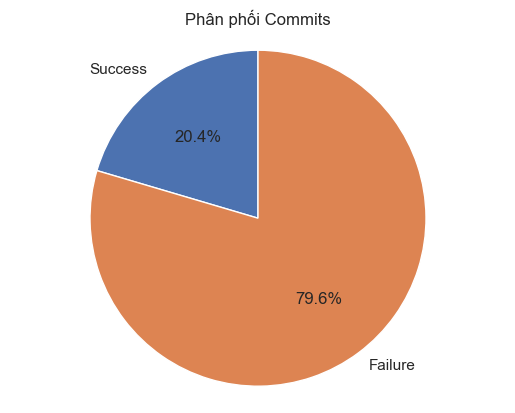

In [1283]:
#Biểu đồ phân bổ commits:
sum_commits_failure = sum_commits - sum_commits_success

labels = ['Success', 'Failure']
sizes = [sum_commits_success, sum_commits_failure]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal') 
plt.title('Phân phối Commits')

plt.show()

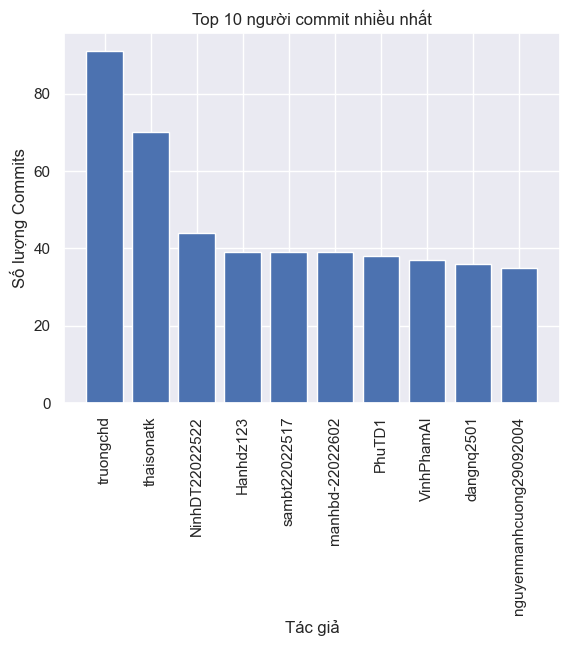

In [1284]:
#Top 10 người commit nhiều nhất:
top_contributors = commits.sort_values(by='Commits', ascending=False).head(10)
contributors_names = top_contributors.Name
commits_counts = top_contributors.Commits

# Tạo biểu đồ cột
plt.bar(contributors_names, commits_counts)
plt.xlabel('Tác giả')
plt.ylabel('Số lượng Commits')
plt.title('Top 10 người commit nhiều nhất')
plt.xticks(rotation=90)

plt.show()


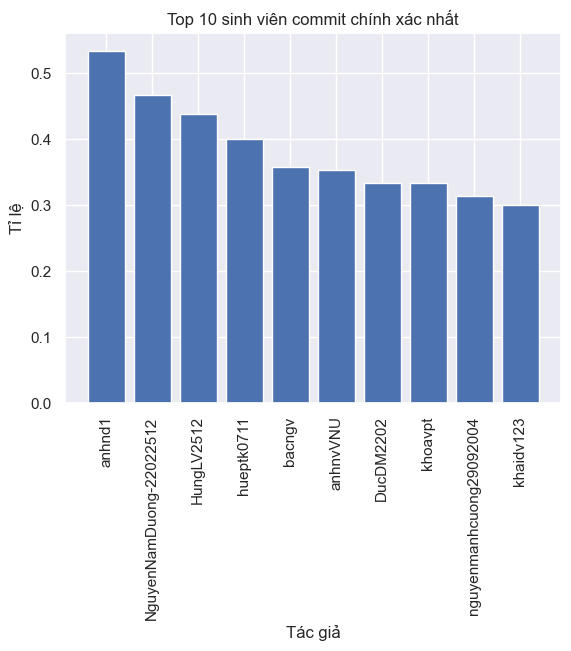

In [1285]:
#Top 10 người có tỉ lệ commit chính xác nhất:
commits_success['Commits Rate'] = commits['Commits Success'] / commits['Commits']
top_contributors = commits_success.sort_values(by='Commits Rate' ,ascending=False).head(10)
contributors_names = top_contributors.Name
success_rate = top_contributors['Commits Rate']

# Tạo biểu đồ cột
plt.bar(contributors_names, success_rate)
plt.xlabel('Tác giả')
plt.ylabel('Tỉ lệ')
plt.title('Top 10 sinh viên commit chính xác nhất')
plt.xticks(rotation=90)

plt.show()


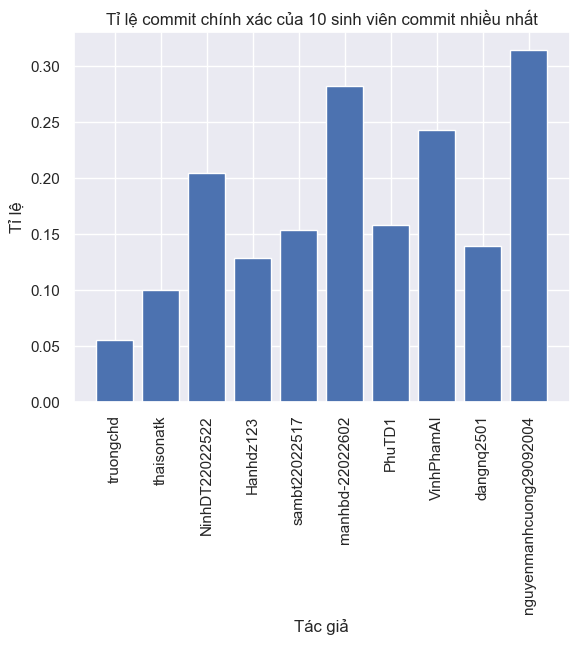

In [1286]:
#Tỉ lệ commit thành công của 10 sinh viên commit nhiều nhất
top_contributors = commits.sort_values(by='Commits', ascending=False).head(10)
contributors_names = top_contributors.Name
commits_counts = top_contributors.Commits
success_rate = top_contributors['Commits Success'] / top_contributors['Commits']
# Tạo biểu đồ cột
plt.bar(contributors_names, success_rate)
plt.xlabel('Tác giả')
plt.ylabel('Tỉ lệ')
plt.title('Tỉ lệ commit chính xác của 10 sinh viên commit nhiều nhất')
plt.xticks(rotation=90)

plt.show()

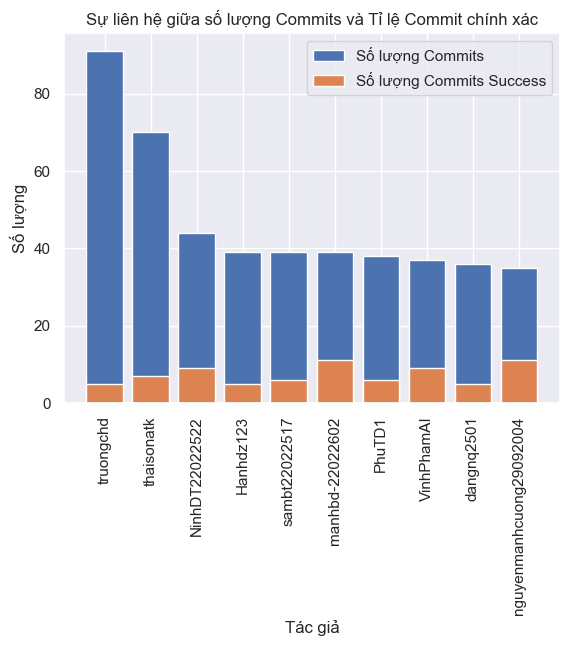

In [1287]:
# Lấy dữ liệu top 10 người commit nhiều nhất và tỉ lệ commit chính xác
top_contributors = commits.sort_values(by='Commits', ascending=False).head(10)
contributors_names = top_contributors.Name
commits_counts = top_contributors.Commits
success_commits = top_contributors['Commits Success']

# Tạo biểu đồ cột chồng
plt.bar(contributors_names, commits_counts, label='Số lượng Commits')
plt.bar(contributors_names, success_commits, label='Số lượng Commits Success')

# Đặt tên các trục và tiêu đề
plt.xlabel('Tác giả')
plt.ylabel('Số lượng')
plt.title('Sự liên hệ giữa số lượng Commits và Tỉ lệ Commit chính xác')

# Hiển thị chú thích
plt.legend()

# Xoay nhãn trục x
plt.xticks(rotation=90)

plt.show()


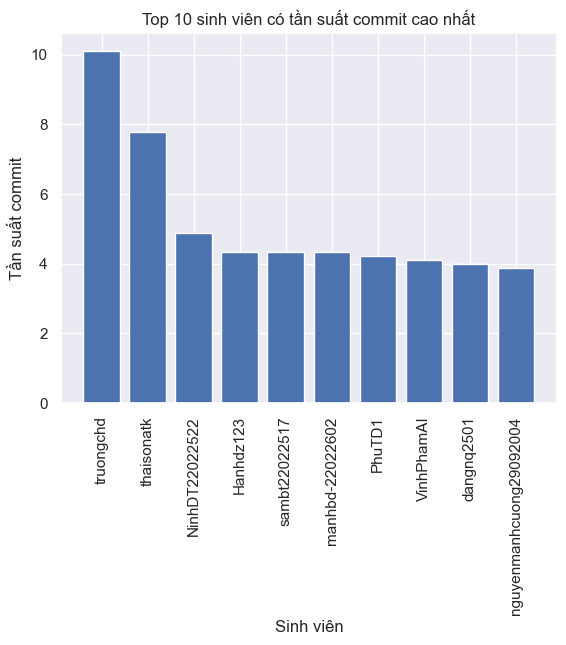

In [1288]:
#Tần suất commit:
commit_frequency = df['Name'].value_counts() / 9 #commits/bài tập

# Lấy 10 sinh viên có tần suất commit cao nhất
top_contributors = commit_frequency.sort_values(ascending=False).head(10)

# Tạo biểu đồ cột
plt.bar(top_contributors.index, top_contributors.values)
plt.xlabel('Sinh viên')
plt.ylabel('Tần suất commit')
plt.title('Top 10 sinh viên có tần suất commit cao nhất')

# Xoay nhãn trục x
plt.xticks(rotation=90)

plt.show()


In [1289]:
#Top 10 từ khoá xuất hiện nhiều nhất trong commit messages
import re
from collections import Counter

commit_messages = ' '.join(df['Message'])
commit_messages = commit_messages.lower()
words = re.findall(r'\b\w+\b', commit_messages)
word_counts = Counter(words)
most_common_words = word_counts.most_common(10)

most_common_words

[('master', 417),
 ('merge', 226),
 ('branch', 222),
 ('into', 196),
 ('gungui98', 193),
 ('week', 101),
 ('add', 92),
 ('files', 73),
 ('via', 73),
 ('upload', 73)]

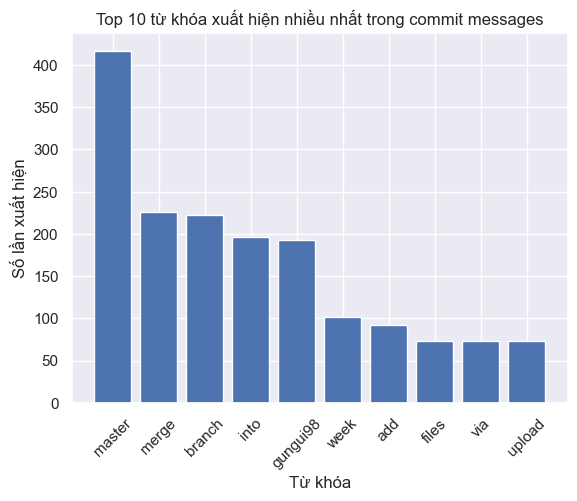

In [1290]:
# Lấy danh sách từ khóa và số lần xuất hiện
keywords = [word for word, count in most_common_words]
counts = [count for word, count in most_common_words]

# Tạo biểu đồ cột
plt.bar(keywords, counts)
plt.xlabel('Từ khóa')
plt.ylabel('Số lần xuất hiện')
plt.title('Top 10 từ khóa xuất hiện nhiều nhất trong commit messages')
plt.xticks(rotation=45)

plt.show()


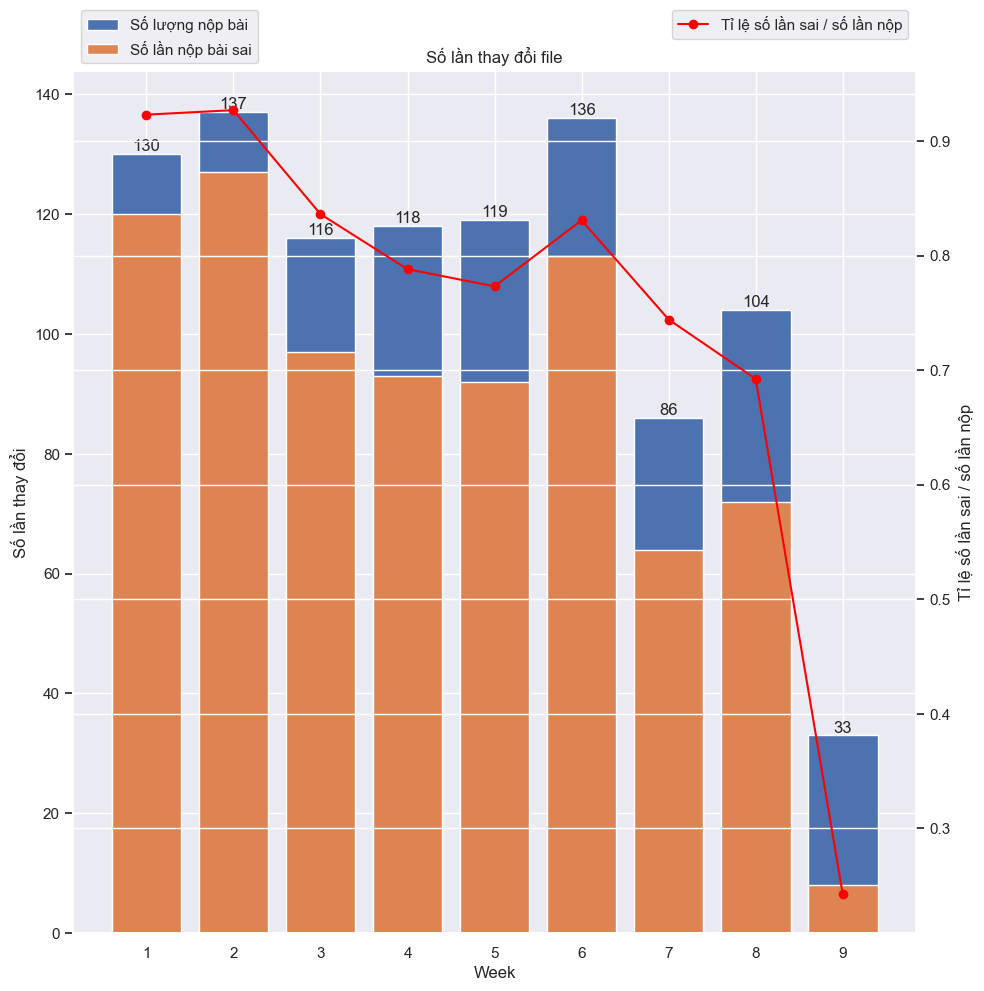

In [1291]:
# Số lần thay đổi file
counter = Counter([item for sublist in df['Week'] for item in sublist])
file_names = list(counter.keys())
file_counts = list(counter.values())

# Tạo một dataframe mới lưu những commit sai
df_1 = df[df['Status'] == 'failure']
counter_1 = Counter([item for sublist in df_1['Week'] for item in sublist])
file_counts_1 = list(counter_1.values())
file_counts_1 = [file_counts_1[i] for i in sorted_indices]

# Tạo biểu đồ
fig, ax1 = plt.subplots(figsize=(10, 10))

# Biểu đồ cột chồng
ax1.bar(list(map(str, file_names)), file_counts, label='Số lượng nộp bài')
ax1.bar(list(map(str, file_names)), file_counts_1, label='Số lần nộp bài sai')

# Đặt tên các trục và tiêu đề
ax1.set_xlabel('Week')
ax1.set_ylabel('Số lần thay đổi')
ax1.set_title('Số lần thay đổi file')

# Hiển thị chú thích
ax1.legend(loc='upper left', bbox_to_anchor=(0.0, 1.08))

# Hiển thị số trên cột
for i in range(len(file_names)):
    ax1.text(i, file_counts[i], str(file_counts[i]), ha='center', va='bottom')

# Tạo một trục y thứ hai
ax2 = ax1.twinx()

df_2 = pd.DataFrame({'Name': file_names, 'Số lần nộp': file_counts, 'Số lần sai': file_counts_1})
# Lấy dữ liệu từ DataFrame df_2
ratios = df_2['Số lần sai'] / df_2['Số lần nộp']

# Biểu đồ đường
ax2.plot(list(map(str, file_names)), ratios, marker='o', color='red', label='Tỉ lệ số lần sai / số lần nộp')

# Đặt tên trục y thứ hai
ax2.set_ylabel('Tỉ lệ số lần sai / số lần nộp')

# Hiển thị chú thích trên trục y thứ hai
ax2.legend(loc='upper right', bbox_to_anchor=(1.0, 1.08))

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


Thời gian sinh viên hoàn thành một bài

In [1292]:
df.head()

,Name,Message,Updated at,Additions,Commits,Status,Week
Pull Request,,,,,,,
85,khaidv123,Add files via upload,2023-05-15 16:40:00,281739,10,failure,[1]
85,khaidv123,commit,2023-05-15 16:44:00,281739,10,success,"[2, 3, 4, 5, 6, 7]"
85,khaidv123,Merge branch 'gungui98:master' into master,2023-05-19 09:55:00,281739,10,failure,[8]
85,khaidv123,commit week8,2023-05-19 14:11:00,281739,10,failure,[8]
85,khaidv123,Add files via upload,2023-05-19 14:19:00,281739,10,failure,[8]


In [1293]:
for name in df['Name'].unique():
    df_2 = df[df['Name'] == name]
    for i in range(1, 9):
        if df_2[df_2['Week'].astype(str).str.contains(str(i))].empty:
            print(name)
print('done')        

done


In [1294]:
#Tạo thêm một dataframe df_3 lưu thời gian làm bài của sinh viên
df_3 = pd.DataFrame(columns=['PR', 'Name'])
for i in range(1, 9):
    df_3['Week ' + str(i)] = pd.NaT

In [1295]:
df_3.head()

,PR,Name,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8


In [1296]:
for name in df['Name'].unique():
    df_2 = df[df['Name'] == name]
    pull_request = df_2.index[0]
    df_3.at[name, 'Name'] = name
    for i in range(1, 9):
        if not df_2[df_2['Week'].astype(str).str.contains(str(i))].empty:
            recent_update = df_2[df_2['Week'].astype(str).str.contains(str(i))]['Updated at'].max()
            min_success_date = df_2[(df_2['Week'].astype(str).str.contains(str(i))) & (df_2['Status'] == 'success')]['Updated at'].min()
            min_success_date = str(min_success_date)
            if (min_success_date != 'nan') & (min_success_date < recent_update):
                recent_update = min_success_date
            df_3.at[name, 'Week ' + str(i)] = recent_update
    df_3.at[name, 'PR'] = pull_request
df_3 = df_3.set_index('Name')


In [1297]:
#Đổi từ thời điểm hoàn thành bài thành thời gian làm bài
df_3['Week 1'] = df_3['Week 1'] - pd.to_datetime('2023-04-21 06:00')
df_3['Week 2'] = df_3['Week 2'] - pd.to_datetime('2023-04-24 09:00')
df_3['Week 3'] = df_3['Week 3'] - pd.to_datetime('2023-04-28 06:00')
df_3['Week 4'] = df_3['Week 4'] - pd.to_datetime('2023-05-05 06:00')
df_3['Week 5'] = df_3['Week 5'] - pd.to_datetime('2023-05-08 09:00')
df_3['Week 6'] = df_3['Week 6'] - pd.to_datetime('2023-05-12 06:00')
df_3['Week 7'] = df_3['Week 7'] - pd.to_datetime('2023-05-15 09:00')
df_3['Week 8'] = df_3['Week 8'] - pd.to_datetime('2023-05-19 06:00')

In [1298]:
df_3.head()

,PR,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8
Name,,,,,,,,,
khaidv123,85,24 days 10:40:00,21 days 07:44:00,17 days 10:44:00,10 days 10:44:00,7 days 07:44:00,3 days 10:44:00,0 days 07:44:00,3 days 03:09:00
NguyenManhAI,84,17 days 03:52:00,14 days 00:52:00,10 days 03:52:00,3 days 03:52:00,0 days 01:57:00,3 days 03:14:00,0 days 01:33:00,0 days 00:13:00
trnamanh12,83,27 days 22:37:00,24 days 19:37:00,20 days 22:37:00,13 days 22:50:00,0 days 02:16:00,6 days 22:30:00,3 days 19:32:00,-1 days +22:33:00
cpython219,80,7 days 02:40:00,4 days 00:21:00,0 days 02:16:00,14 days 08:46:00,11 days 05:55:00,7 days 08:31:00,4 days 06:03:00,0 days 09:16:00
dangnq2501,79,7 days 01:56:00,3 days 22:31:00,0 days 01:45:00,13 days 22:59:00,7 days 06:50:00,3 days 04:06:00,0 days 01:15:00,-1 days +23:10:00


In [1299]:
df_3.isna().any().any()

False

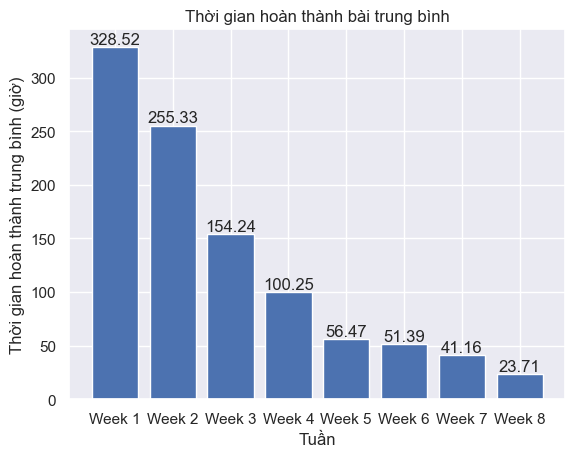

In [1300]:
#Trung bình thời gian hoàn thành bài
week = df_3.columns[1:9]
mean_time = df_3.mean().values[1:9]
time = [t.total_seconds() / 3600 for t in mean_time]

plt.bar(week, time)
plt.xlabel('Tuần')
plt.ylabel('Thời gian hoàn thành trung bình (giờ)')
plt.title('Thời gian hoàn thành bài trung bình')

# Hiển thị giá trị trên mỗi cột
for i in range(len(week)):
    plt.text(week[i], time[i], str(round(time[i], 2)), ha='center', va='bottom')

plt.show()


In [1301]:
#Tạo df_4 lưu trạng thái hoàn thành bài trên lớp
df_4 = df_3.copy()
for i in range(1, 9): 
    df_3['Week ' + str(i)] = pd.to_timedelta(df_3['Week ' + str(i)])
    df_4['Week ' + str(i)] = df_3['Week ' + str(i)] < pd.Timedelta(hours=3)

In [1302]:
df_4.head()

,PR,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8
Name,,,,,,,,,
khaidv123,85,False,False,False,False,False,False,False,False
NguyenManhAI,84,False,False,False,False,True,False,True,True
trnamanh12,83,False,False,False,False,True,False,False,True
cpython219,80,False,False,True,False,False,False,False,False
dangnq2501,79,False,False,True,False,False,False,True,True


In [1303]:
#Số lần sinh viên hoàn thành bài trên lớp
true_counts = df_4.iloc[:, 1:].sum(axis=1)
true_counts.sort_values(ascending=False)

Name
VinhBQ21-7                 6
hueptk0711                 5
manhbd-22022602            5
Binhdn04                   4
HungLV2512                 4
tannn0                     4
NguyenNamDuong-22022512    4
TienVM2004                 4
VinhPhamAI                 4
nguyenmanhcuong29092004    4
bacngv                     4
NguyenManhAI               3
NinhDT22022522             3
sambt22022517              3
dangnq2501                 3
PhuTD1                     3
DucDM2202                  3
NguyenDung0210             3
khoavpt                    2
nhatdm22022537             2
anhnd1                     2
nhuyha                     2
trnamanh12                 2
truongchd                  2
thaisonatk                 1
cpython219                 1
hieuhn09                   1
khaidv123                  0
minhnn1                    0
anhnvVNU                   0
Hanhdz123                  0
dtype: int64

In [1304]:
#Sinh viên làm xong bài sớm nhất
df_5 = pd.DataFrame(columns=['Week', 'PR', 'Name', 'Min Time'])

for i in range(1, 9):
    week = 'Week ' + str(i)
    min_time = df_3[week].min()
    name = df_3[df_3[week] == min_time].index[0]  # Truy xuất giá trị cột 'Name' từ hàng đầu tiên
    pr = df_3[df_3[week] == min_time].PR
    df_5 = pd.concat([df_5, pd.DataFrame({'Week': [week], 'PR' : pr, 'Name': [name], 'Min Time': [min_time]})], ignore_index=True)
df_5

,Week,PR,Name,Min Time
0,Week 1,41,VinhBQ21-7,7 days 01:47:00
1,Week 2,79,dangnq2501,3 days 22:31:00
2,Week 3,79,dangnq2501,0 days 01:45:00
3,Week 4,41,VinhBQ21-7,0 days 02:31:00
4,Week 5,11,manhbd-22022602,0 days 00:43:00
5,Week 6,12,nhatdm22022537,0 days 00:26:00
6,Week 7,72,bacngv,-1 days +16:25:00
7,Week 8,72,bacngv,-1 days +20:15:00


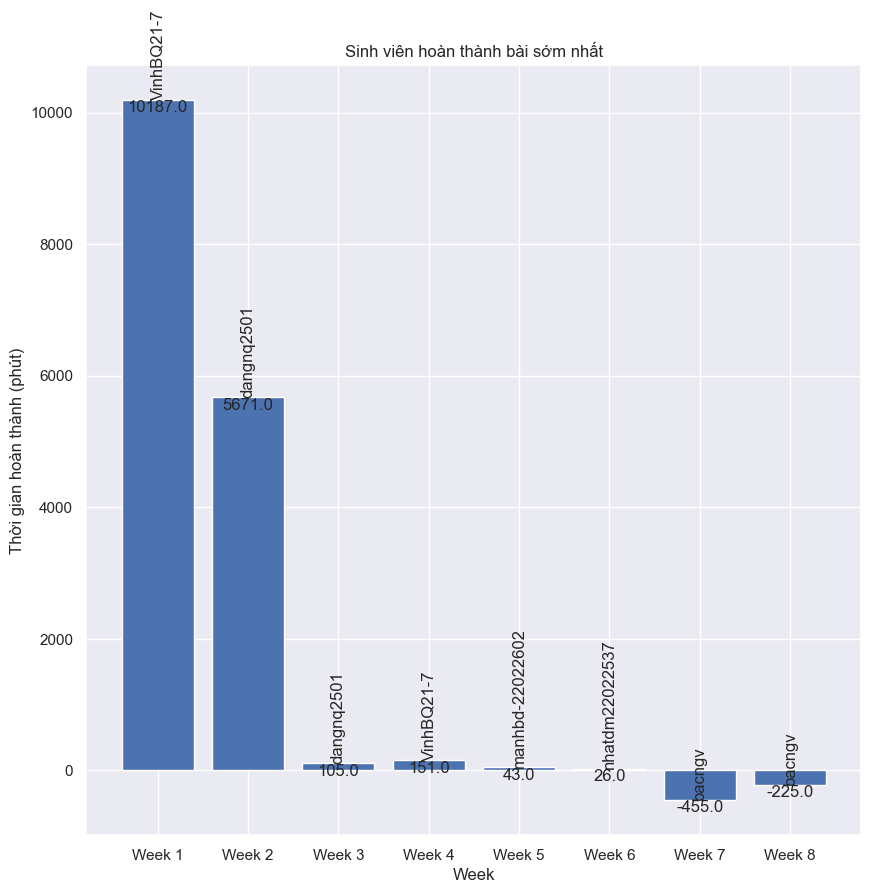

In [1313]:
def draw_bar(df):
    week = df['Week']
    students = df['Name']
    completion_time = [t.total_seconds() / 60 for t in df['Min Time']]

    plt.figure(figsize=(10, 10))
    plt.bar(week, completion_time)
    plt.xlabel('Week')
    plt.ylabel('Thời gian hoàn thành (phút)')
    plt.title('Sinh viên hoàn thành bài sớm nhất')

    # Gắn nhãn cho từng cột
    for i in range(len(completion_time)):
        plt.text(i, completion_time[i], str(students[i]), ha='center', va='bottom', rotation=90)
        plt.text(i, completion_time[i], str(completion_time[i]), ha='center', va='top')

    plt.show()
draw_bar(df_5)

In [1314]:
#Sinh viên làm xong bài sớm nhất(tính từ khi bắt đầu tiết học)
df_6 = pd.DataFrame(columns=['Week', 'PR', 'Name', 'Min Time'])

for i in range(1, 9):
    week = 'Week ' + str(i)
    min_time = df_3[df_3[week] > pd.Timedelta(0)][week].min()
    name = df_3[df_3[week] == min_time].index[0]  # Truy xuất giá trị cột 'Name' từ hàng đầu tiên
    pr = df_3[df_3[week] == min_time].PR
    df_6 = pd.concat([df_6, pd.DataFrame({'Week': [week], 'PR' : pr, 'Name': [name], 'Min Time': [min_time]})], ignore_index=True)
df_6

,Week,PR,Name,Min Time
0,Week 1,41,VinhBQ21-7,7 days 01:47:00
1,Week 2,79,dangnq2501,3 days 22:31:00
2,Week 3,79,dangnq2501,0 days 01:45:00
3,Week 4,41,VinhBQ21-7,0 days 02:31:00
4,Week 5,11,manhbd-22022602,0 days 00:43:00
5,Week 6,12,nhatdm22022537,0 days 00:26:00
6,Week 7,58,hueptk0711,0 days 00:21:00
7,Week 8,11,manhbd-22022602,0 days 00:09:00


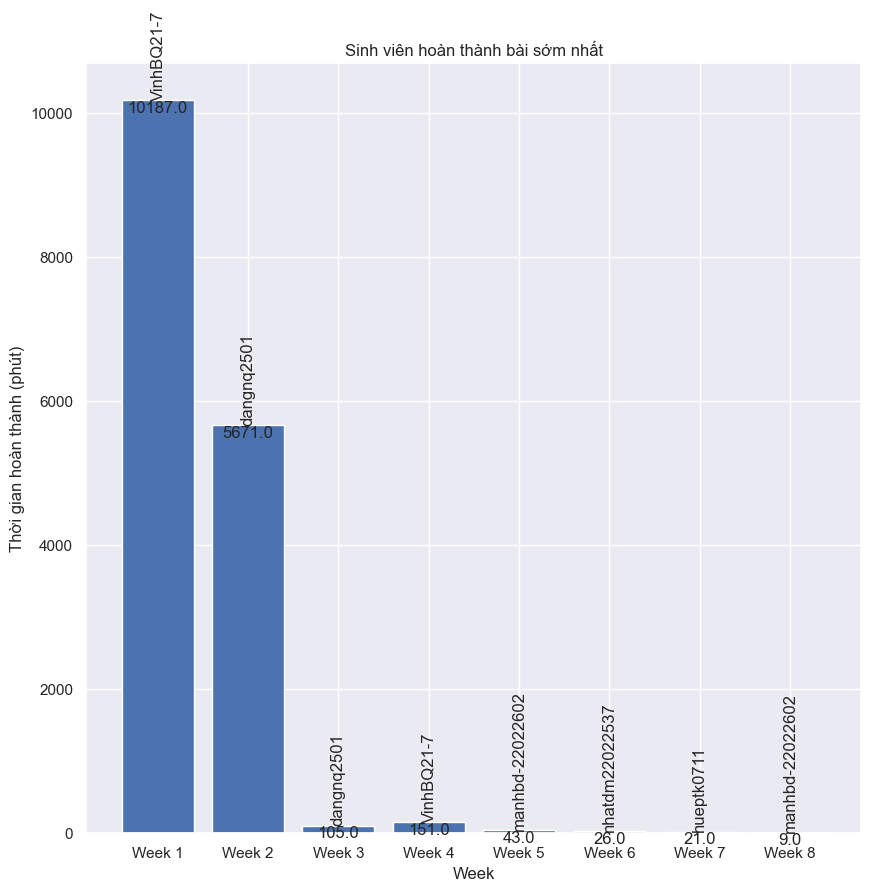

In [1315]:
draw_bar(df_6)

In [1316]:
df_3.head(10)

,PR,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8
Name,,,,,,,,,
khaidv123,85,24 days 10:40:00,21 days 07:44:00,17 days 10:44:00,10 days 10:44:00,7 days 07:44:00,3 days 10:44:00,0 days 07:44:00,3 days 03:09:00
NguyenManhAI,84,17 days 03:52:00,14 days 00:52:00,10 days 03:52:00,3 days 03:52:00,0 days 01:57:00,3 days 03:14:00,0 days 01:33:00,0 days 00:13:00
trnamanh12,83,27 days 22:37:00,24 days 19:37:00,20 days 22:37:00,13 days 22:50:00,0 days 02:16:00,6 days 22:30:00,3 days 19:32:00,-1 days +22:33:00
cpython219,80,7 days 02:40:00,4 days 00:21:00,0 days 02:16:00,14 days 08:46:00,11 days 05:55:00,7 days 08:31:00,4 days 06:03:00,0 days 09:16:00
dangnq2501,79,7 days 01:56:00,3 days 22:31:00,0 days 01:45:00,13 days 22:59:00,7 days 06:50:00,3 days 04:06:00,0 days 01:15:00,-1 days +23:10:00
thaisonatk,78,13 days 10:09:00,10 days 07:53:00,6 days 11:14:00,2 days 08:47:00,3 days 19:23:00,3 days 03:16:00,3 days 19:56:00,0 days 01:02:00
khoavpt,73,17 days 04:51:00,14 days 01:51:00,10 days 04:51:00,3 days 04:51:00,0 days 01:44:00,2 days 23:37:00,0 days 00:28:00,4 days 04:14:00
bacngv,72,17 days 04:02:00,14 days 01:02:00,10 days 04:02:00,3 days 04:02:00,0 days 01:36:00,0 days 00:33:00,-1 days +16:25:00,-1 days +20:15:00
nguyenmanhcuong29092004,68,17 days 01:29:00,13 days 22:28:00,10 days 01:30:00,3 days 01:31:00,0 days 00:56:00,0 days 00:43:00,0 days 00:28:00,0 days 00:37:00


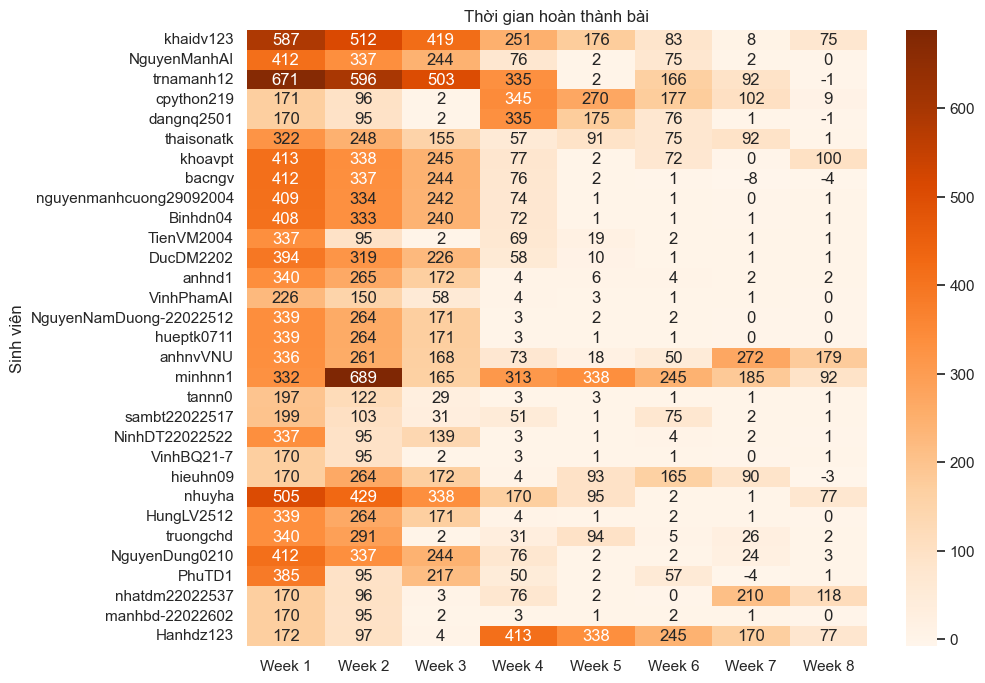

In [1235]:
df_numeric = df_3.iloc[:, 1:].apply(lambda x: x.dt.total_seconds() / 3600)

# Tạo heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric, annot=True, fmt=".0f", cmap="Oranges")
plt.ylabel('Sinh viên')
plt.title('Thời gian hoàn thành bài')

plt.show()
